# Ascenso de la colina

El algoritmo de ascenso de la colina es un algoritmo de búsqueda local (que busca en las regiones próximas al estado actual) basado en la optimización de una función objetivo que está determinada por el problema que queremos resolver.

Aquí se implementa una versión del algoritmo de la colina aplicado al problema de las $k$ reinas, colocadas en un tablero. En principio, la solución consiste en encontrar una configuración del tablero donde las reinas no se ataquen.

In [1]:
from Queens import Board
import numpy as np
from copy import deepcopy

### Creación del problema

El problema consistirá en colocar un número $k$ de piezas reinas en un tablero de ajedrez. Se colocaran con una configuración inicial en donde la mayoría de las reinas no se atacan y se buscará organizarlas en una configuración que permita que se ataquen la mayoría de las reinas.

Otra forma de configurar el problema es que se inicie en un estado dado aleatorio y de allí se parta a encontrar la solución donde las reinas no se ataquen. Ambos problemas son factibles, pero es más común encontrar la solución donde ninguna reina se esté atacando.

En este caso iniciamos con una configuración inicial donde toda reina está en la diagonal.

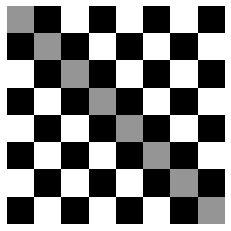

In [2]:
#Crea el problema
board = Board(size=8)
board.put_pieces(num=8, init='line')

#Visualiza el problema
board.draw()

## Algoritmo de ascendo de la colina

Para poder definir el algoritmo de manera adecuada, definimos dos funciones que son: la función objetivo y una función para tomar en cuenta en cada estado, los estados cercanos que maximicen la función objetivo.

La función objetivo suma un 1 si una de las reinas ataca a cualquiera otra de las reinas. En este caso, como el algoritmo de ascenso de la colina busca minimizar, podemos usar el valor negativo para minimizar el número de ataques. Es decir, entre más reinas se ataquen el valor será más pequeño. Y el máximo global será 0.

Por otra parte, definimos las acciones que puede hacer la reina, en este caso, limitamos la acción a sólo los cuadros vecinos. Es decir, la reina se podrá mover sólamente en las vecindades de los cuadros actuales.

In [3]:
def objective(board):    
    """Heurística que detecta el número de piezas que se atacan"""
    s = board.size
    matrix = board.queen_board
    err = 0
    queens = np.stack(np.where(matrix == 1)).T
    for i,j in queens:
        for k in range(1,s+1):
            #Revisa la diagonal
            if i+k<s and j+k<s:
                if [i+k,j+k] in queens.tolist():
                    err += 1
            if i-k>=0 and j-k>=0: 
                if [i-k,j-k] in queens.tolist():
                    err += 1
            if i-k>=0 and j+k<s:
                if matrix[i-k, j+k] ==1:
                    err += 1
            if i+k<s and j-k>=0:
                if matrix[i+k, j-k] ==1:
                    err += 1
                    
            #Revisa las columnas
            if i+k<s:
                if matrix[i+k,j]== 1:
                    err += 1
            if i-k >= 0:
                if matrix[i-k,j]== 1:
                    err += 1
            
            #Revisa los renglones
            if j+k<s:
                if matrix[i,j+k]== 1:
                    err += 1
            if j-k >= 0:
                if matrix[i,j-k]== 1:
                    err += 1
    return -err

def best_valued_neighbor(board):
    """Regresa un movimiento cercano con mejor valor para la búsquda"""
    results = np.vstack(np.where(board.queen_board == 1))
    rand = np.random.choice([i for i in range(results.shape[1])])
    neighbors = []
    for pos in results.T:
        i,j = pos
        moves = [(i, j+1), (i+1,j), (i-1,j), (i,j-1), 
                 (i-1,j-1), (i+1,j+1), (i-1,j+1), (i+1,j-1)]
    
        for m, new_board in zip(moves, [deepcopy(board) for j in range(4)]):
            if m[0]>0 and m[1]>0 and m[0]<board.size and m[1]<board.size:
                if new_board.board[m[0]][m[1]]['piece'] != 'Q':
                    new_board.queen_board[i,j] = 0
                    new_board.board[i][j]['piece'] = None

                    new_board.queen_board[m[0],m[1]] = 1
                    new_board.board[m[0]][m[1]]['piece'] = 'Q'
                    neighbors.append(new_board)
            else:
                neighbors.append(new_board)

    best_idx = np.argmax([objective(b) for b in neighbors])
    return neighbors[best_idx]

Tomemos el valor de la función objetivo en la configuración actual.

In [4]:
print("Función objetivo: {}".format(objective(board)))

Función objetivo: -56


### Implementación del algoritmo

El algoritmo de ascenso de la colina buscará maximizar (o minimizar) la función objetivo a partir de hacer una búsqueda en los estados próximos al estado actual. El algoritmo es muy sencillo, pues consiste en:

1. Guardar el estado actual del problema.
2. Buscar de manera local, el estado al que sea mejor avanzar.
3. Se detendrá cuando la función objetivo no se haya maximizado.

In [5]:
def hill_climbing(problem, objective):
    """Algoritmo de ascenso de la colina"""
    #Guarda configuración actual
    current = deepcopy(problem)
    while True:
        #Elige un estado vecino que tenga mejor valor
        neighbor = best_valued_neighbor(current)
        #Si el nuevo movimiento tiene una mejor función objetivo
        #que el estado anterior cambia el estado, de lo contrario
        #permanece igual.
        if objective(current) >= objective(neighbor):
            return current
        else:
            current = deepcopy(neighbor)
            
    return current

Aplicando el algoritmo al problema, vemos que con pocas piezas encuentra una solución adecuada, aunque no necesariamente una solución mínima. De hecho, cuando comenzamos con la configuración inicial, y limitamos los movimientos de la reina a una sóla casilla, vemos que el algoritmo converge a un máximo local. Cualquier otro movimiento que se haga no puede maximizar la función objetivo ya establecida, por tanto, el algoritmo se detiene a pesar de que todavía hay algunas reinas que se atacan.

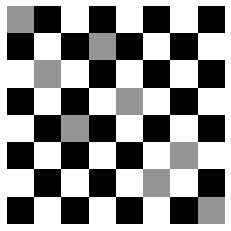

Función objetivo de la solución: -8


In [6]:
solution_board = hill_climbing(board, objective)

solution_board.draw()
print("Función objetivo de la solución: {}".format(objective(solution_board)))